# Run 56

### Big questions/studies to answer/address:

- Study of selection of TDC event from Multi TDC hits (*no significant effect*)
- Issue of faulty correlations for Tray 1 vs Tray 3 and Tray 2 vs Tray 4 *(confirmed not analysis software issue)*
- Affect of deadtimes on overall scheme
- Study of "good" events using cuts around the TDC Sum mean
- Resolving fake "channels" from asymmetry data
- Understanding why we get $>8$ TDC events 
- Techniques for creation of Image
    - Discrete Case using projection
    - Continuous Case using projection
    - Track Reconstruction
    - ML techniques

---

In [1]:
from MuonDataFrame import *
file = "processed_data/events_data_frame_56.h5"
mdfo = MuonDataFrame(file, isNew=False, d1="last") #Muon Data Frame Object 

In [2]:
mdf = mdfo.events_df

In [145]:
plt.rcParams['figure.figsize'] = [10, 7]

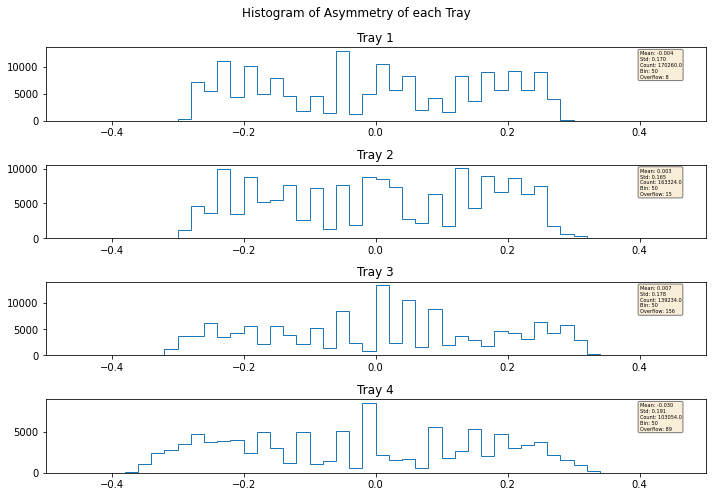

In [146]:
mdfo.getAsymmetry1DPlots()

in module L1vsL2_run_56: 23.0 overflow Events


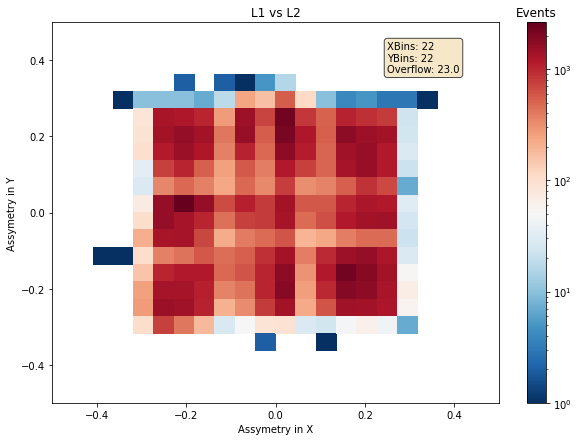

In [147]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 22
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

Looking at the distribution at higher binning

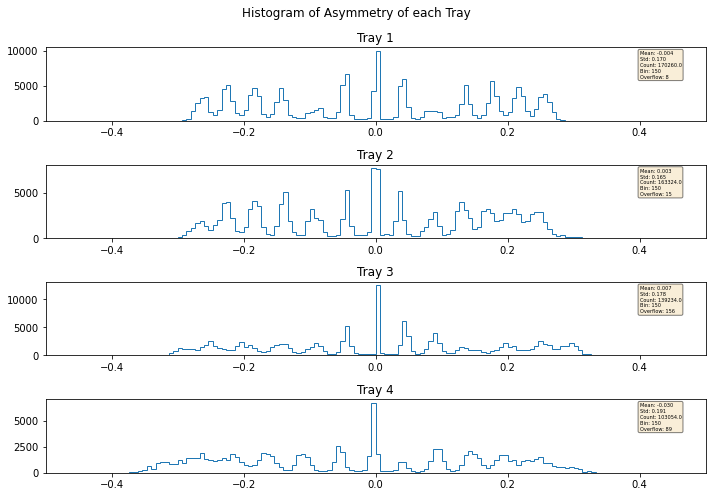

In [148]:
mdfo.getAsymmetry1DPlots(nbin=150)

in module L1vsL2_run_56: 23.0 overflow Events


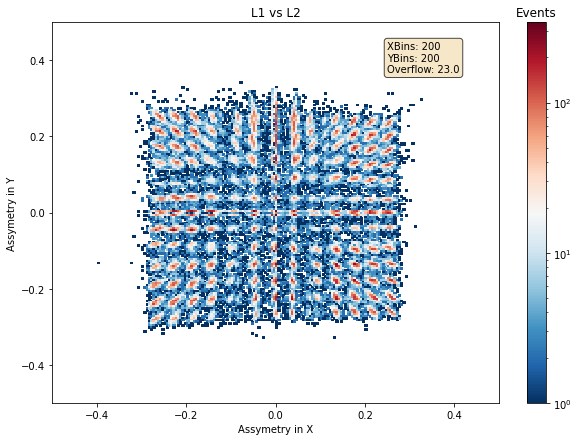

In [149]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 200
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

## Understanding the effect of deadtime

In [150]:
mdfo.getStats("sumL1")

count    170260.000000
mean        194.770234
std          14.200531
min          97.000000
25%         188.000000
50%         195.000000
75%         200.000000
max        1818.000000
Name: sumL1, dtype: float64

In [151]:
mdfo.keepEvents("deadtime", 1500, "<=")

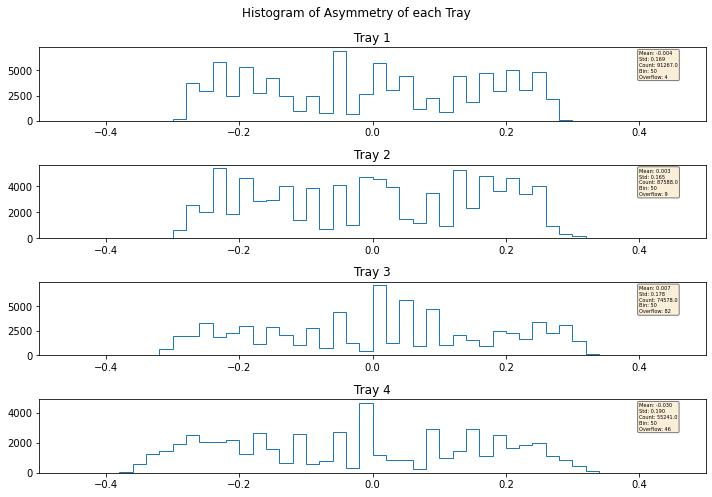

In [152]:
mdfo.getAsymmetry1DPlots()

In [153]:
mdfo.getStats("sumL1")['mean']

194.83241478299934

In [154]:
mdfo.getStats("sumL2")

count    87588.000000
mean       194.904861
std         14.467962
min         75.000000
25%        186.000000
50%        194.000000
75%        202.000000
max       1420.000000
Name: sumL2, dtype: float64

In [155]:
mdfo.getStats("sumL3")

count    74578.000000
mean       175.127987
std         17.701612
min         19.000000
25%        166.000000
50%        173.000000
75%        183.000000
max       1843.000000
Name: sumL3, dtype: float64

In [156]:
mdfo.getStats("sumL4")

count    55241.000000
mean       174.166127
std         15.439030
min         16.000000
25%        165.000000
50%        173.000000
75%        183.000000
max       1126.000000
Name: sumL4, dtype: float64

### Observation 1:
**Deadtime doesn't affect sumTDC and asymmetry data significantly**

---

## Keeping TDC events close to the mean of TDC sums

In [157]:
dev = 5
mdfo.keepEvents("sumL1", mdfo.getStats("sumL1")['mean']+dev, "<=")
mdfo.keepEvents("sumL1", mdfo.getStats("sumL1")['mean']-dev, ">=")

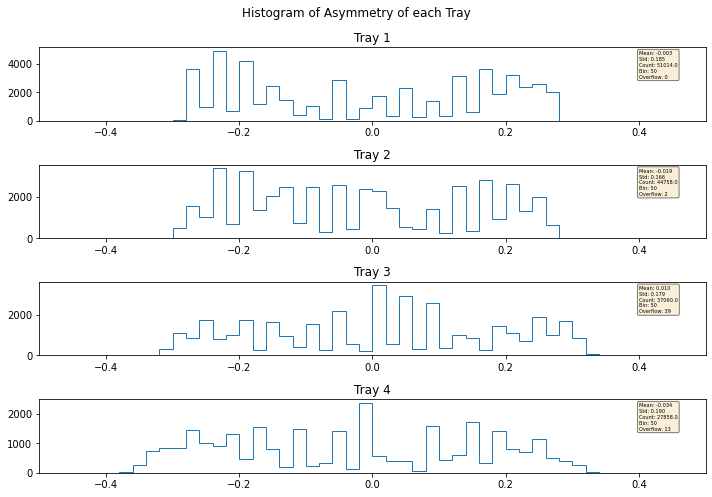

In [158]:
mdfo.getAsymmetry1DPlots()

In [159]:
dev = 5
term = "sumL2"
mdfo.keepEvents(term, mdfo.getStats(term)['mean']+dev, "<=")
mdfo.keepEvents(term, mdfo.getStats(term)['mean']-dev, ">=")

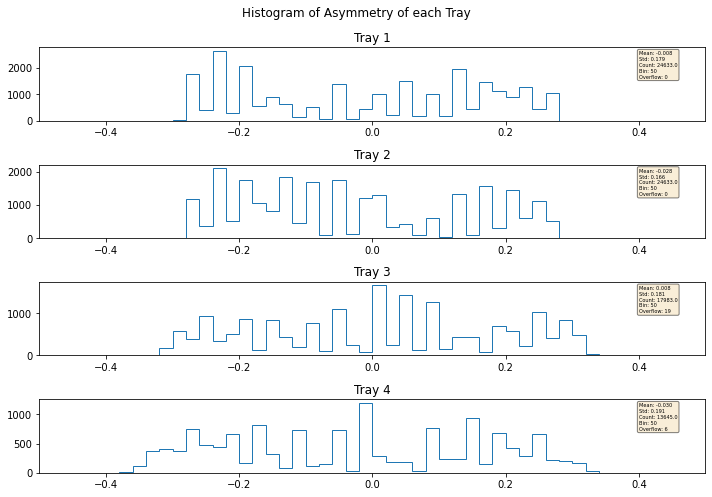

In [160]:
mdfo.getAsymmetry1DPlots()

In [161]:
dev = 5
term = "sumL3"
mdfo.keepEvents(term, mdfo.getStats(term)['mean']+dev, "<=")
mdfo.keepEvents(term, mdfo.getStats(term)['mean']-dev, ">=")

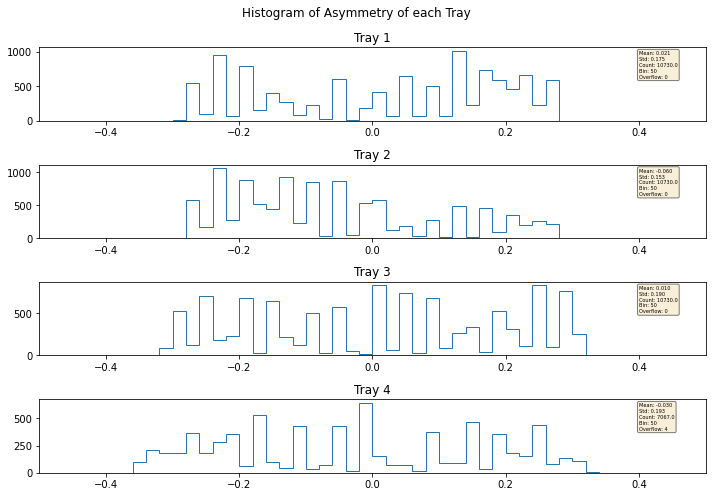

In [162]:
mdfo.getAsymmetry1DPlots()

In [163]:
dev = 5
term = "sumL4"
mdfo.keepEvents(term, mdfo.getStats(term)['mean']+dev, "<=")
mdfo.keepEvents(term, mdfo.getStats(term)['mean']-dev, ">=")

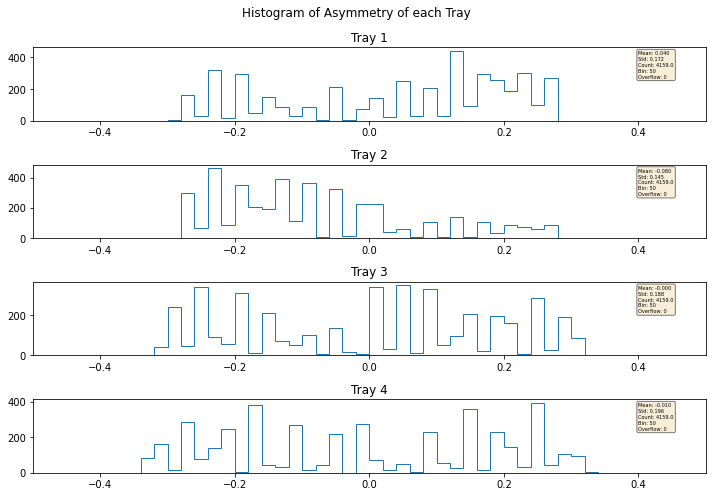

In [164]:
mdfo.getAsymmetry1DPlots()

Looking at the new filtered data set at higher bins

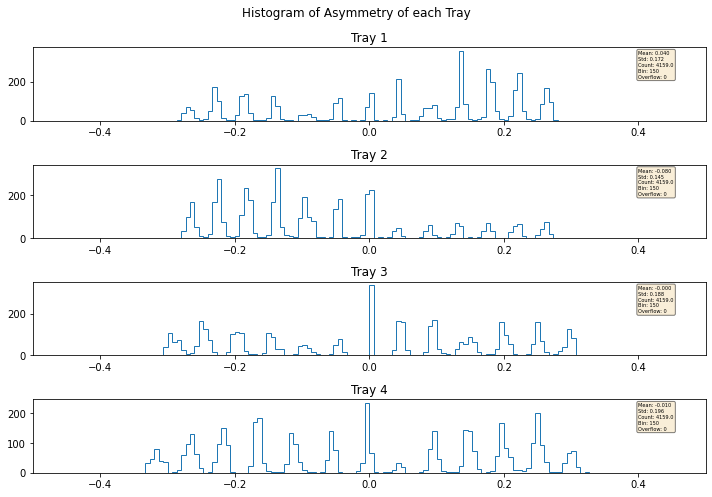

In [169]:
mdfo.getAsymmetry1DPlots(nbin=150)

in module L1vsL2_run_56: 23.0 overflow Events


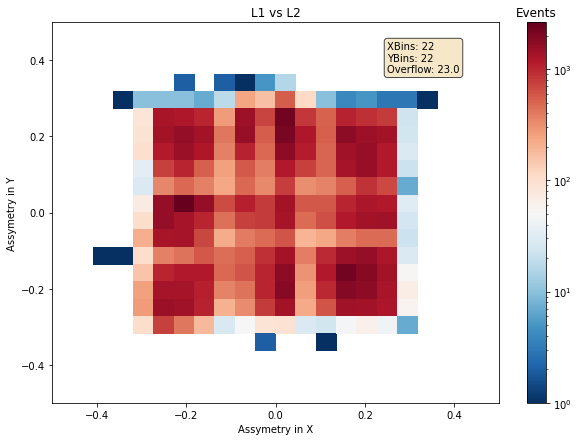

In [170]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 22
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

in module L1vsL2_run_56: 23.0 overflow Events


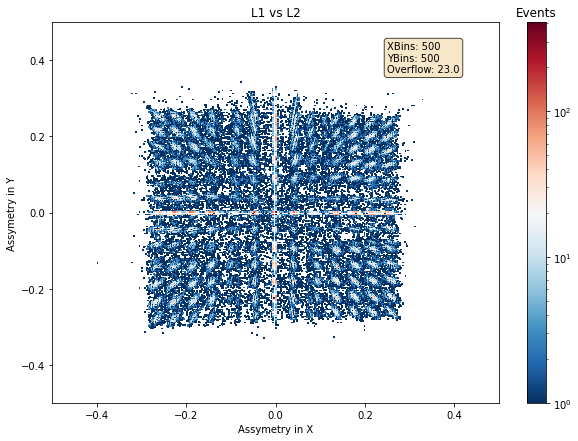

In [171]:
xmin = -0.5
xmax = 0.5
ymin = -0.5
ymax = 0.5
nbins = 500
mdfo.get2DHistogram(mdf['asymL1'].values,
                            mdf['asymL2'].values, "L1 vs L2",
                            "Assymetry in X", "Assymetry in Y", xmin, xmax,
                            ymin, ymax, nbins)

### Observation 2:

Trimming the data set leads to more refined peaks. However, extra bars are "seen".

We need to address the issue of the "extra" channels. Experiments involving reduced channels can be conducted to isolate the cause of this issue.

### Observation 3:

In Trays 1 and 2, there's some anticorrelation going on in terms of the frequence of the asymmetries. What does this mean?

Trays 3 and 4 look flat. 

*Assuming we are seeing some sort of shadow, then this result makes sense if the lead brick is off centre.*

### Observation 4:

2D Histo does not show any significant difference compared to before. 1D Histos' definitely do.

*This seems to agree with MC results from Cris*

---

## Understanding extra TDC hits registered

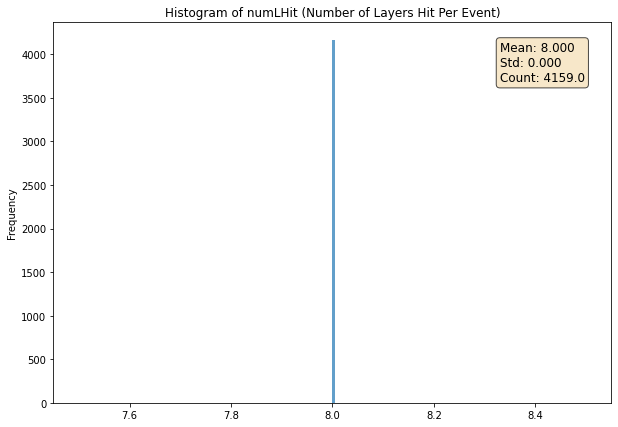

In [173]:
mdfo.getNumLayersHitPlot()

In [174]:
mdfo.lookAt('TDC').values[0]

[[0, 97],
 [1, 89],
 [2, 105],
 [3, 80],
 [4, 73],
 [6, 100],
 [7, 65],
 [8, 61],
 [9, 106],
 [10, 48]]

## Resolution 1:

We get 10 TDC events because we are reading 10 TDC channels! Fixed this issue and implemented in code.

---

Saving this trimmed MDF object

In [184]:
mdfo_best = mdfo

Testing new code for hit counts

In [182]:
mdfo.reload()